


$ H = - \frac{d^2}{dx^2} + V_0 \exp{(-x^2)}$


$H\Psi = E\Psi$

Задачи:
- Оценить энергию основного состояния методом подгонки константы связи


In [1]:
from tokenize import Double
import numpy as np
import time
from scipy.sparse import diags
from scipy.linalg import eigh_tridiagonal
from scipy.linalg import eig
from scipy.sparse.linalg import inv as sparseInv
from scipy.linalg import inv as Inv
from scipy.optimize import fsolve
from scipy import interpolate
from matplotlib import pyplot as plt
true = True
false = False

maxIterNumber = 10000

def getPotentialValue(x: np.double, v_0: np.double) -> np.double:
    return (-1) * v_0 * np.exp(-1 * (x * x), dtype=np.double)

def makeDiffMatrix(n: int, R: np.double, v_0: np.double) -> np.ndarray:
    delta = 2*R / (n-1)
    diagonal = np.zeros(n, dtype=np.double)
    subDiagonal = np.ones(n-1, dtype=np.double) * (-1) / (delta * delta)
    
    xs = np.linspace(-R, R, n, dtype=np.double)
    
    for i in range(n):
        diagonal[i] = 2 / (delta * delta) + getPotentialValue(xs[i], v_0)

    # return diags([diagonal, subDiagonal, subDiagonal], [0, -1, 1])  
    return (diagonal, subDiagonal)

def makeHamiltonian(n: int, R: np.double, v_0: np.double) -> np.ndarray:
    delta = 2*R / (n-1)
    H0_diagonal = np.zeros(n, dtype=np.double)
    V_diagonal = np.zeros(n, dtype=np.double)
    H0_subDiagonal = np.ones(n-1, dtype=np.double) * (-1) / (delta * delta)
    
    xs = np.linspace(-R, R, n, dtype=np.double)
    
    for i in range(n):
        H0_diagonal[i] = 2 / (delta * delta)
        V_diagonal[i] = getPotentialValue(xs[i], v_0)

    # return diags([diagonal, subDiagonal, subDiagonal], [0, -1, 1])  
    return (H0_diagonal, H0_subDiagonal, V_diagonal)

def makeResolvent(z:np.double, H0_diag: np.ndarray, H0_subdiag: np.ndarray) -> np.ndarray:
    newDiag = H0_diag - z * np.ones_like(H0_diag)
    matr = diags([newDiag, H0_subdiag, H0_subdiag], [0, 1, -1], dtype=np.double).toarray() 
    # result = sparseInv(matr)
    result = Inv(matr)
    return result#.toarray()

def estimateOfMax(matrix, acc):
    n = matrix.shape[0]
    residueValue = 100
    currentVector = np.random.normal(loc=0.0, scale=0.2, size=n)
    currenValue = np.linalg.norm(currentVector)

    currentVector = currentVector / currenValue

    print(np.linalg.norm(currentVector))

    iterNumber = 0
    while residueValue > acc:
        



        iterNumber += 1
        if iterNumber > maxIterNumber:
            print("Calculation exceeds {} iterations!".format(maxIterNumber))
            break




My result E = -3.14996171, lib result E = -3.14996171


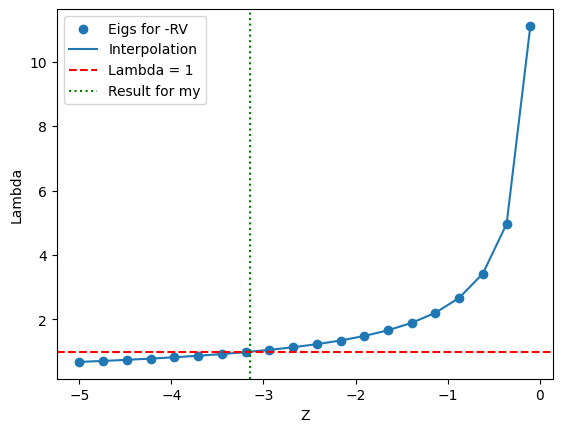

In [3]:
numberOfPoints = 100 #[100, 20, 30,  50, 70, 100, 150,]# 200, 300, 500, 700, 1000, 1200, 1500, 1750, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,]
boxBorder = 10
potential = 5

energies = []
timeConsumed = []
iterLimit = 100000000

interval = np.linspace(-5, -0.1, 20)
lambdas = []
lambdas2 = []
for z in interval:
    (H0_diagonal, H0_subDiagonal, V_diagonal) = makeHamiltonian(numberOfPoints, boxBorder, potential)
    R = makeResolvent(z, H0_diagonal, H0_subDiagonal)
    V = diags([V_diagonal], [0], dtype=np.double)

    ourOperator = ((-1) * R * V)#.toarray()

    (eigValues, eigVectors) = eig(ourOperator)


    prevL = 1000.0
    currL = 0.0
    currVec = np.random.normal(loc=0.0, scale=0.2, size=numberOfPoints)
    currVec = currVec / np.linalg.norm(currVec)
    niter = 0
    residueValue = 1000
    while residueValue > 0.001 and niter < 100000:# and niter < iterLimit:
        prevL = currL
        currVec = ourOperator @ currVec
        currL = np.linalg.norm(currVec)
        currVec = currVec / currL

        residueVector = ourOperator * currVec - currL * currVec
        residueValue = np.linalg.norm(residueVector)
        

        niter += 1
    estimateOfLambda = currL



    lambdas.append(estimateOfLambda)
    lambdas2.append(max(eigValues.real))
    # print("My estimate is: {:.4f}  , lib function: {:.4f}".format(estimateOfLambda, max(eigValues.real)))



f = interpolate.interp1d(interval, lambdas)
f2 = interpolate.interp1d(interval, lambdas2)




root = fsolve(lambda x: f(x) - 1, x0=-0.15)
root2 = fsolve(lambda x: f2(x) - 1, x0=-3)
print("My result E = {:.8f}, lib result E = {:.8f}".format(root[0], root2[0]))

plt.scatter(interval, lambdas, label="Eigs for -RV")
# plt.scatter(interval, lambdas2)
plt.plot(interval, f(interval), label="Interpolation")
plt.axhline(y=1, color='r', linestyle='dashed', label="Lambda = 1")
plt.axvline(x=root[0], color='g', linestyle=':', label='Result for my')
# plt.axvline(x=root2[0], color='r', linestyle=':', label='Result for lib')
plt.xlabel('Z')
plt.ylabel('Lambda')
plt.legend(loc='upper left')
plt.savefig(("Results.png"), dpi=300, bbox_inches='tight')
plt.show()